<a href="https://colab.research.google.com/github/thogeti/ALMLPract/blob/master/AutoML/AutoML_MLbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.2 MB 1.1 MB/s 
     |████████████████████████████████| 13.0 MB 44.6 MB/s 
     |████████████████████████████████| 1.9 MB 51.7 MB/s 
     |████████████████████████████████| 10.4 MB 68.7 MB/s 
     |████████████████████████████████| 294 kB 58.0 MB/s 
     |████████████████████████████████| 7.0 MB 38.6 MB/s 
     |████████████████████████████████| 86.3 MB 59 kB/s 
     |████████████████████████████████| 1.2 MB 56.0 MB/s 
     |████████████████████████████████| 4.3 MB 45.6 MB/s 
     |████████████████████████████████| 103 kB 57.4 MB/s 
     |████████████████████████████████| 1.7 MB 50.9 MB/s 
     |████████████████████████████████| 449 kB 57.4 MB/s 
     |████████████████████████████████| 50 kB 9.2 MB/s 
     |████████████████████████████████| 3.8 MB 37.2 MB/s 
  Created wheel for mlbox: filename=mlbox-0.8.5-py3-none-any.whl size=43755 sha256=453e262

In [1]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [2]:
target_name='SalePrice'
rd=Reader(sep=",")
df=rd.train_test_split(['/content/train.csv','/content/test.csv'],target_name)


reading csv : train.csv ...
cleaning data ...
CPU time: 4.545009613037109 seconds

reading csv : test.csv ...
cleaning data ...
CPU time: 0.337296724319458 seconds

> Number of common features : 80

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 43
> Number of numerical features: 37
> Number of training samples : 1460
> Number of test samples : 1459

> Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

> Task : regression
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [3]:
df

{'target': 0       208500.0
 1       181500.0
 2       223500.0
 3       140000.0
 4       250000.0
           ...   
 1455    175000.0
 1456    210000.0
 1457    266500.0
 1458    142125.0
 1459    147500.0
 Name: SalePrice, Length: 1460, dtype: float64,
 'test':       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
 0        896.0       0.0        0.0   NaN           2.0     1Fam       TA   
 1       1329.0       0.0        0.0   NaN           3.0     1Fam       TA   
 2        928.0     701.0        0.0   NaN           3.0     1Fam       TA   
 3        926.0     678.0        0.0   NaN           3.0     1Fam       TA   
 4       1280.0       0.0        0.0   NaN           2.0   TwnhsE       TA   
 ...        ...       ...        ...   ...           ...      ...      ...   
 1454     546.0     546.0        0.0   NaN           3.0    Twnhs       TA   
 1455     546.0     546.0        0.0   NaN           3.0   TwnhsE       TA   
 1456    1224.0       0.0        0

In [4]:
dft=Drift_thresholder()
df=dft.fit_transform(df) #drop the non-stable featues from test and train


computing drifts ...
CPU time: 5.46564507484436 seconds

> Top 10 drifts

('Id', 0.9986301369863013)
('Fireplaces', 0.048838500726284595)
('BsmtFinType1', 0.0381524082967617)
('Exterior1st', 0.037468599100967115)
('BsmtFinSF1', 0.03518115670628452)
('MSZoning', 0.030447939825593684)
('TotalBsmtSF', 0.029285978499506093)
('LotConfig', 0.029165489655818444)
('HeatingQC', 0.02880050303217052)
('OverallQual', 0.02865688968995128)

> Deleted variables : ['Id']
> Drift coefficients dumped into directory : save


In [5]:
space = {
    
        'est__strategy':{"search":"choice",
                                  "space":["LightGBM"]},    
        'est__n_estimators':{"search":"choice",
                                  "space":[150]},    
        'est__colsample_bytree':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__subsample':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__max_depth':{"search":"choice",
                                  "space":[5,6,7,8,9]},
        'est__learning_rate':{"search":"choice",
                                  "space":[0.07]} 
    
        }
params = Optimiser().optimise(space, df,15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8976579945625346, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.9378128097290055, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


MEAN SCORE : neg_mean_squared_error = -887453869.7889649
VARIANCE : 8000929.298302412 (fold 1 = -879452940.4906625, fold 2 = -895454799.0872673)
CPU time: 0.6168549060821533 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9433034457809104, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8819681599384728, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : neg_mean_squared


fitting the pipeline ...
CPU time: 5.485890626907349 seconds


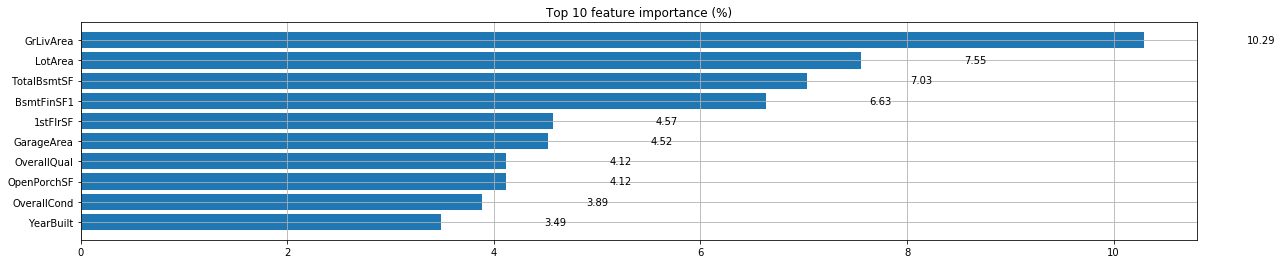


> Feature importances dumped into directory : save

predicting...
CPU time: 0.4006054401397705 seconds

> Overview on predictions : 

   SalePrice_predicted
0        125459.383155
1        156802.858560
2        186010.990235
3        188734.287612
4        192316.333655
5        172591.970641
6        176151.980514
7        168875.002401
8        188372.605012
9        125425.293289

dumping predictions into directory : save ...


In [6]:
prd = Predictor()
prd.fit_predict(params,df)